In [1]:
from chefboost import Chefboost as chef
from sklearn.compose import make_column_transformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd 

In [2]:
load_prices = 'ASS05_DATA.csv'

housing_data = pd.read_csv(load_prices)
print(housing_data.shape)
housing_data.head()



(1460, 6)


,LotArea,TotalBsmtSF,GarageCars,SalePrice,AGE,TotalArea
0,12108,1440,0,118000,53,1440
1,9400,945,0,127500,31,980
2,1680,672,0,91500,35,1218
3,8430,1040,0,124000,31,1040
4,7500,1080,0,141000,4,1080


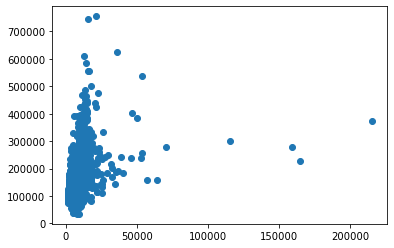

In [3]:
#LotArea vs Sale Price
plt.scatter(housing_data['LotArea'], housing_data['SalePrice'])
plt.show()

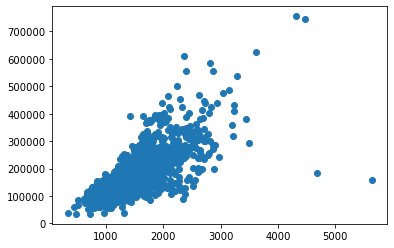

In [4]:
#Total Area vs Sale Price

plt.scatter(housing_data['TotalArea'], housing_data['SalePrice'])
plt.show()

In [5]:
x=np.array(housing_data['TotalArea'])
y=np.array(housing_data['SalePrice'])

In [6]:

x= x.reshape(-1,1)
y= y.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(x ,y , test_size=0.30)


In [7]:
print(X_train, X_test)

[[1453]
 [1498]
 [ 768]
 ...
 [1224]
 [ 788]
 [1344]] [[ 789]
 [ 334]
 [1194]
 [ 848]
 [1248]
 [2134]
 [1804]
 [1034]
 [1056]
 [1668]
 [2417]
 [1750]
 [ 894]
 [2021]
 [2097]
 [ 864]
 [1218]
 [1788]
 [1144]
 [1466]
 [1482]
 [1775]
 [1664]
 [1268]
 [1217]
 [1558]
 [1652]
 [1144]
 [1855]
 [1148]
 [2526]
 [1928]
 [1509]
 [ 813]
 [1718]
 [1008]
 [1214]
 [2031]
 [1432]
 [1120]
 [1506]
 [1709]
 [1635]
 [ 912]
 [1959]
 [1230]
 [1688]
 [1357]
 [1640]
 [1600]
 [1839]
 [1137]
 [1136]
 [ 999]
 [1144]
 [1852]
 [1040]
 [ 923]
 [1724]
 [1224]
 [1092]
 [ 948]
 [1376]
 [1828]
 [1664]
 [1419]
 [ 988]
 [1363]
 [1801]
 [2945]
 [1790]
 [2727]
 [1314]
 [1576]
 [1472]
 [1610]
 [1904]
 [1768]
 [2031]
 [2069]
 [1929]
 [1501]
 [ 858]
 [ 841]
 [1644]
 [1572]
 [ 864]
 [1588]
 [ 904]
 [1652]
 [3228]
 [ 924]
 [1982]
 [1616]
 [1382]
 [1702]
 [1647]
 [1601]
 [2290]
 [ 845]
 [1004]
 [2259]
 [ 864]
 [1489]
 [2620]
 [1525]
 [2792]
 [1647]
 [1317]
 [1668]
 [1188]
 [1749]
 [1200]
 [1604]
 [1411]
 [1812]
 [ 968]
 [1138]
 [

In [8]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
clf.predict(X_test)

array([[104162.93155872],
       [ 55477.01138855],
       [147498.75061129],
       [110476.05087749],
       [153276.85981829],
       [248080.65162218],
       [212769.98424601],
       [130378.42703496],
       [132732.47152671],
       [198217.70920614],
       [278362.2239478 ],
       [206991.875039  ],
       [115398.14390568],
       [235989.4230964 ],
       [244121.57679515],
       [112188.08323512],
       [150066.79914773],
       [211057.95188838],
       [142148.64949368],
       [176603.30069103],
       [178315.33304867],
       [209666.9255978 ],
       [197789.70111673],
       [155416.90026533],
       [149959.79712538],
       [186447.48674742],
       [196505.67684851],
       [142148.64949368],
       [218227.08738597],
       [142576.65758309],
       [290025.44438417],
       [226038.23501766],
       [181204.38765217],
       [106730.98009517],
       [203567.81032374],
       [127596.37445381],
       [149638.79105833],
       [237059.44331992],
       [1729

In [10]:
y_pred=clf.predict(X_test)

In [11]:
print ('R-squared Error')
clf.score(X_train, y_train)

R-squared Error


0.501846669288861

In [12]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

y_true = y_test
print("Mean Squared Error = ")
mse(X_train, y_train)


Mean Squared Error = 


37986280269.35519

In [13]:
print('Adjusted R-squared Score = ')

r2_score(y_test, y_pred)

Adjusted R-squared Score = 


0.5401989493420198

In [14]:
print("Average Squared Error = ")
mse(y_true, y_pred)

Average Squared Error = 


2912285639.0757403

In [15]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf.get_n_splits(x)



5

In [16]:
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [19]:

for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]


TRAIN: [ 292  293  294 ... 1457 1458 1459] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2